## Cohen's d

$d = \frac{\mu_1 - \mu_2}{s}$

$s = \sqrt{\frac{(n_1 - 1) * s_1^2 + (n_2 - 1) * s_2^2}{n_1 + n_2 - 2}}$

In [ ]:
import numpy as np
from math import sqrt

def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = np.mean(d1), np.mean(d2)
    return (u1 - u2) / s

np.random.seed(1)
data1 = 10 * np.random.randn(10000) + 60
data2 = 10 * np.random.randn(10000) + 55
d = cohend(data1, data2)
print(f"Cohen's d: {d:.3f}")

Cohen's d: 0.500


Two other popular methods for quantifying the difference effect size are:
* Odds Ratio. Measures the odds of an outcome occurring from one treatment compared to another.
* Relative Risk Ratio. Measures the probabilities of an outcome occurring from one treatment compared to another.

## Pearson's Correlation

A unit-free effect size measure, that can be interpreted in a standard way, as follows:
* -1.0: Perfect negative relationship.
* -0.7: Strong negative relationship
* -0.5: Moderate negative relationship
* -0.3: Weak negative relationship
* 0.0: No relationship.
* 0.3: Weak positive relationship
* 0.5: Moderate positive relationship
* 0.7: Strong positive relationship
* 1.0: Perfect positive relationship.

In [ ]:
import numpy as np
from scipy.stats import pearsonr

np.random.seed(1)
data1 = 10 * np.random.randn(10000) + 50
data2 = data1 + (10 * np.random.randn(10000) + 50)

corr, _ = pearsonr(data1, data2)
print(f"Pearson's Correlation: {corr:.3f}")

Pearson's Correlation: 0.712




## Statistical Power

**Statistical Power** is the probability that a hypothesis test will **correctly reject the null hypothesis ($H_0$)** when the alternative hypothesis ($H_a$) is true. In simpler terms, it is the probability of finding an effect when that effect genuinely exists in the population.

* **Formula:** Power is defined as $1$ minus the probability of a **Type II Error** ($\beta$)
* **True Positive:** This corresponds to the probability of a **True Positive** result, meaning the model or test correctly identifies the presence of an effect.
    $$\text{Pr}(\text{True Positive}) = 1 - \text{Pr}(\text{False Negative})$$
* **Utility:** The concept of power is relevant **only when the null hypothesis is false** (i.e., when there is an effect to be found).

***

## The Four Components of Power Analysis

Statistical power is part of a puzzle involving four related parameters. If you know any three, you can calculate the fourth. This forms the basis of **power analysis**, a crucial tool for designing experiments.

### 1. Effect Size

* **Definition:** The **quantified magnitude of a result** present in the population. It measures the strength of the phenomenon being studied.
* **Measurement:** Calculated using specific statistical measures, such as **Pearson's correlation coefficient** ($r$) for relationships between variables or **Cohen's $d$** for the difference between group means.
* **Relationship to Power:** A larger effect size is easier to detect, resulting in **higher power**.

### 2. Sample Size ($n$)

* **Definition:** The number of observations in the sample used for the statistical test.
* **Relationship to Power:** A **larger sample size** increases the precision of the sample statistics, making the true effect easier to distinguish from random noise, thus **increasing power**.

### 3. Significance Level ($\alpha$)

* **Definition:** The significance level used in the statistical test (the probability of committing a Type I Error, or false positive). It is often set at $0.05$.
* **Relationship to Power:** Increasing the significance level (e.g., moving $\alpha$ from $0.05$ to $0.10$) **increases the rejection region**, making it easier to reject $H_0$, which in turn **increases power**. However, this comes at the cost of increasing the risk of a Type I error.

### 4. Statistical Power

* **Definition:** The probability of accepting the alternative hypothesis if it is true.
* **Goal:** Researchers typically aim for a power level of $0.80$ (or $80\%$) as a minimum.

### Power Analysis in Practice

Power analysis involves estimating one of these four parameters given values for the three others. For example:

* **Design Phase (A Priori):** Estimating the necessary **sample size** given a desired Power ($0.80$), a standard $\alpha$ ($0.05$), and an expected Effect Size.
* **Analysis Phase (Post Hoc):** Estimating the actual **statistical power** achieved given the observed Effect Size, the Sample Size, and the $\alpha$ level.
### Student's t-Test Power Analysis Example for Sample

In [ ]:
from statsmodels.stats.power import TTestIndPower

effect = 0.8
alpha = 0.05
power = 0.8

analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print(f'Sample Size: {result:.3f}')

Sample Size: 25.525


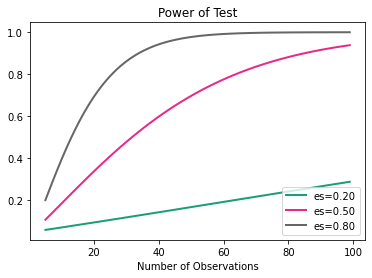

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()